In [152]:
import pandas as pd
import numpy as np
import hvplot.pandas as hvplot
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [153]:
# Import the data the model has not seen
texans_2022_df = pd.read_csv(
    'Resources/2022_texans_results.csv',
    header=1,
    index_col='Date'
)

texans_2022_df.head()

,Week,Day,Unnamed: 3,Unnamed: 4,Unnamed: 5,OT,Rec,Unnamed: 8,Opp,Tm,...,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms
Date,,,,,,,,,,,,,,,,,,,,,
09/11/2022,1,Sun,1:00PM ET,boxscore,T,OT,0-0-1,NaN,Indianapolis Colts,20,...,77,1,33,517,340,177,2,-2.14,-5.67,9.43
09/18/2022,2,Sun,4:25PM ET,boxscore,L,NaN,0-1-1,@,Denver Broncos,9,...,80,0,20,350,201,149,1,-12.19,-3.38,5.20
09/25/2022,3,Sun,1:00PM ET,boxscore,L,NaN,0-2-1,@,Chicago Bears,20,...,92,2,17,363,82,281,2,-1.75,-2.69,1.18


In [154]:
# Drop the first week from the data
texans_2022_df.drop(texans_2022_df.index[0], axis=0, inplace=True)


# Drop the unnecessary columns to clean the data frame
texans_2022_df.drop('Week', axis=1, inplace=True)
texans_2022_df.drop('Unnamed: 3', axis=1, inplace=True)
texans_2022_df.drop('Unnamed: 4', axis=1, inplace=True)
texans_2022_df.drop('Unnamed: 8', axis=1, inplace=True)
texans_2022_df.drop('Rec', axis=1, inplace=True)
texans_2022_df.drop('OT', axis=1, inplace=True)
texans_2022_df.drop(['Tm','Opp.1'], axis=1, inplace=True)

# Rename the win/loss column
texans_2022_df.rename(columns={'Unnamed: 5':'win/loss'}, inplace=True)

# Change the win/loss columns to binary
texans_2022_df.loc[(texans_2022_df['win/loss'] == 'L'), 'results'] = 0
texans_2022_df.loc[(texans_2022_df['win/loss'] == 'W'), 'results'] = 1

# Display the clean data frame
texans_2022_df.head()

,Day,win/loss,Opp,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,results
Date,,,,,,,,,,,,,,,,,
09/18/2022,Sun,L,Denver Broncos,15,234,154,80,0,20,350,201,149,1,-12.19,-3.38,5.20,0.0
09/25/2022,Sun,L,Chicago Bears,17,329,237,92,2,17,363,82,281,2,-1.75,-2.69,1.18,0.0


In [155]:
# Read in the 2021 texans data
texans_2021_df = pd.read_csv(
    'Resources/2021_texans_results.csv',
    header=1,
    index_col='Date'
)

texans_2021_df.head()

,Week,Day,Unnamed: 3,Unnamed: 4,Unnamed: 5,OT,Rec,Unnamed: 8,Opp,Tm,...,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms
Date,,,,,,,,,,,,,,,,,,,,,
09/12/2021,1,Sun,1:00PM ET,boxscore,W,NaN,Jan-00,NaN,Jacksonville Jaguars,37.0,...,160.0,0.0,20.0,395.0,319.0,76.0,3.0,14.76,1.54,-0.16
09/19/2021,2,Sun,1:00PM ET,boxscore,L,NaN,01-Jan,@,Cleveland Browns,21.0,...,82.0,2.0,22.0,355.0,199.0,156.0,2.0,9.61,-8.22,-8.62
09/23/2021,3,Thu,8:20PM ET,boxscore,L,NaN,02-Jan,NaN,Carolina Panthers,9.0,...,42.0,0.0,28.0,407.0,290.0,117.0,0.0,-5.60,-14.35,5.17
10/03/2021,4,Sun,1:00PM ET,boxscore,L,NaN,03-Jan,@,Buffalo Bills,0.0,...,48.0,5.0,26.0,450.0,251.0,199.0,1.0,-32.68,-14.54,6.40
10/10/2021,5,Sun,1:00PM ET,boxscore,L,NaN,04-Jan,NaN,New England Patriots,22.0,...,67.0,1.0,21.0,352.0,226.0,126.0,2.0,13.76,-6.89,-8.60


In [156]:
# Drop the bye week from the data
texans_2021_df.drop(texans_2021_df.index[9], axis=0, inplace=True)

# Drop the unnecessary columns to clean the data frame
texans_2021_df.drop('Week', axis=1, inplace=True)
texans_2021_df.drop('Unnamed: 3', axis=1, inplace=True)
texans_2021_df.drop('Unnamed: 4', axis=1, inplace=True)
texans_2021_df.drop('Unnamed: 8', axis=1, inplace=True)
texans_2021_df.drop('Rec', axis=1, inplace=True)
texans_2021_df.drop('OT', axis=1, inplace=True)

# Rename the win/loss column
texans_2021_df.rename(columns={'Unnamed: 5':'win/loss'}, inplace=True)

# Change the win/loss columns to binary
texans_2021_df.loc[(texans_2021_df['win/loss'] == 'L'), 'results'] = 0
texans_2021_df.loc[(texans_2021_df['win/loss'] == 'W'), 'results'] = 1

# Display the clean data frame
texans_2021_df.head()

,Day,win/loss,Opp,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,results
Date,,,,,,,,,,,,,,,,,,,
09/12/2021,Sun,W,Jacksonville Jaguars,37.0,21.0,22.0,449.0,289.0,160.0,0.0,20.0,395.0,319.0,76.0,3.0,14.76,1.54,-0.16,1.0
09/19/2021,Sun,L,Cleveland Browns,21.0,31.0,17.0,302.0,220.0,82.0,2.0,22.0,355.0,199.0,156.0,2.0,9.61,-8.22,-8.62,0.0
09/23/2021,Thu,L,Carolina Panthers,9.0,24.0,14.0,193.0,151.0,42.0,0.0,28.0,407.0,290.0,117.0,0.0,-5.60,-14.35,5.17,0.0
10/03/2021,Sun,L,Buffalo Bills,0.0,40.0,6.0,109.0,61.0,48.0,5.0,26.0,450.0,251.0,199.0,1.0,-32.68,-14.54,6.40,0.0
10/10/2021,Sun,L,New England Patriots,22.0,25.0,14.0,360.0,293.0,67.0,1.0,21.0,352.0,226.0,126.0,2.0,13.76,-6.89,-8.60,0.0


In [157]:
results_21_22 = pd.concat((texans_2021_df,texans_2022_df), axis=0)

results_21_22

,Day,win/loss,Opp,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,results
Date,,,,,,,,,,,,,,,,,,,
09/12/2021,Sun,W,Jacksonville Jaguars,37.0,21.0,22.0,449.0,289.0,160.0,0.0,20.0,395.0,319.0,76.0,3.0,14.76,1.54,-0.16,1.0
09/19/2021,Sun,L,Cleveland Browns,21.0,31.0,17.0,302.0,220.0,82.0,2.0,22.0,355.0,199.0,156.0,2.0,9.61,-8.22,-8.62,0.0
09/23/2021,Thu,L,Carolina Panthers,9.0,24.0,14.0,193.0,151.0,42.0,0.0,28.0,407.0,290.0,117.0,0.0,-5.60,-14.35,5.17,0.0
10/03/2021,Sun,L,Buffalo Bills,0.0,40.0,6.0,109.0,61.0,48.0,5.0,26.0,450.0,251.0,199.0,1.0,-32.68,-14.54,6.40,0.0
10/10/2021,Sun,L,New England Patriots,22.0,25.0,14.0,360.0,293.0,67.0,1.0,21.0,352.0,226.0,126.0,2.0,13.76,-6.89,-8.60,0.0
10/17/2021,Sun,L,Indianapolis Colts,3.0,31.0,19.0,353.0,229.0,124.0,3.0,15.0,388.0,214.0,174.0,0.0,-9.92,-17.25,0.25,0.0
10/24/2021,Sun,L,Arizona Cardinals,5.0,31.0,8.0,160.0,118.0,42.0,1.0,24.0,397.0,225.0,172.0,1.0,-23.71,-13.37,10.47,0.0
10/31/2021,Sun,L,Los Angeles Rams,22.0,38.0,18.0,323.0,279.0,44.0,1.0,26.0,467.0,302.0,165.0,0.0,1.75,-22.20,8.01,0.0
11/07/2021,Sun,L,Miami Dolphins,9.0,17.0,14.0,272.0,199.0,73.0,4.0,22.0,262.0,215.0,47.0,5.0,-19.43,8.14,4.21,0.0


In [158]:
X_21_22 = results_21_22.drop(['Day','win/loss','Opp','results','Tm','Opp.1'], axis=1)

y_21_22 = results_21_22['results']

y_21_22.head()

Date
09/12/2021    1.0
09/19/2021    0.0
09/23/2021    0.0
10/03/2021    0.0
10/10/2021    0.0
Name: results, dtype: float64

In [159]:
texans_2020_df = pd.read_csv(
    'Resources/2020_texans_results.csv',
    header=1,
    index_col='Date'
)

texans_2020_df.head()

,Week,Day,Unnamed: 3,Unnamed: 4,Unnamed: 5,OT,Rec,Unnamed: 8,Opp,Tm,...,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms
Date,,,,,,,,,,,,,,,,,,,,,
9/10/2020,1,Thu,8:20PM ET,boxscore,L,NaN,0-1,@,Kansas City Chiefs,20.0,...,118.0,1.0,28.0,369.0,203.0,166.0,0.0,8.16,-22.94,-1.59
9/20/2020,2,Sun,4:25PM ET,boxscore,L,NaN,0-2,NaN,Baltimore Ravens,16.0,...,51.0,2.0,23.0,407.0,177.0,230.0,0.0,-5.68,-15.93,3.20
9/27/2020,3,Sun,1:00PM ET,boxscore,L,NaN,0-3,@,Pittsburgh Steelers,21.0,...,29.0,1.0,25.0,387.0,218.0,169.0,0.0,4.41,-15.39,2.08
10/4/2020,4,Sun,1:00PM ET,boxscore,L,NaN,0-4,NaN,Minnesota Vikings,23.0,...,96.0,1.0,24.0,410.0,248.0,162.0,0.0,8.81,-17.07,1.44
10/11/2020,5,Sun,1:00PM ET,boxscore,W,NaN,1-4,NaN,Jacksonville Jaguars,30.0,...,129.0,2.0,22.0,364.0,289.0,75.0,2.0,18.24,-2.21,1.26


In [160]:
# Drop the bye week from the data
texans_2020_df.drop(texans_2020_df.index[7], axis=0, inplace=True)

# Drop the unnecessary columns to clean the data frame
texans_2020_df.drop('Week', axis=1, inplace=True)
texans_2020_df.drop('Unnamed: 3', axis=1, inplace=True)
texans_2020_df.drop('Unnamed: 4', axis=1, inplace=True)
texans_2020_df.drop('Unnamed: 8', axis=1, inplace=True)
texans_2020_df.drop('Rec', axis=1, inplace=True)
texans_2020_df.drop('OT', axis=1, inplace=True)

# Rename the win/loss column
texans_2020_df.rename(columns={'Unnamed: 5':'win/loss'}, inplace=True)

# Change the win/loss columns to binary
texans_2020_df.loc[(texans_2020_df['win/loss'] == 'L'), 'results'] = 0
texans_2020_df.loc[(texans_2020_df['win/loss'] == 'W'), 'results'] = 1

# Display the clean data frame
texans_2020_df.head()

,Day,win/loss,Opp,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,results
Date,,,,,,,,,,,,,,,,,,,
9/10/2020,Thu,L,Kansas City Chiefs,20.0,34.0,21.0,360.0,242.0,118.0,1.0,28.0,369.0,203.0,166.0,0.0,8.16,-22.94,-1.59,0.0
9/20/2020,Sun,L,Baltimore Ravens,16.0,33.0,18.0,304.0,253.0,51.0,2.0,23.0,407.0,177.0,230.0,0.0,-5.68,-15.93,3.20,0.0
9/27/2020,Sun,L,Pittsburgh Steelers,21.0,28.0,13.0,260.0,231.0,29.0,1.0,25.0,387.0,218.0,169.0,0.0,4.41,-15.39,2.08,0.0
10/4/2020,Sun,L,Minnesota Vikings,23.0,31.0,20.0,386.0,290.0,96.0,1.0,24.0,410.0,248.0,162.0,0.0,8.81,-17.07,1.44,0.0
10/11/2020,Sun,W,Jacksonville Jaguars,30.0,14.0,24.0,486.0,357.0,129.0,2.0,22.0,364.0,289.0,75.0,2.0,18.24,-2.21,1.26,1.0


In [161]:
texans_2019_df = pd.read_csv(
    'Resources/2019_texans_results.csv',
    header=1,
    index_col='Date'
)

texans_2019_df.head()

,Week,Day,Unnamed: 3,Unnamed: 4,Unnamed: 5,OT,Rec,Unnamed: 8,Opp,Tm,...,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms
Date,,,,,,,,,,,,,,,,,,,,,
9/9/2019,1,Mon,7:10PM ET,boxscore,L,NaN,0-1,@,New Orleans Saints,28.0,...,180.0,1.0,25.0,510.0,362.0,148.0,1.0,19.60,-23.59,0.06
9/15/2019,2,Sun,1:00PM ET,boxscore,W,NaN,1-1,NaN,Jacksonville Jaguars,13.0,...,126.0,0.0,16.0,281.0,178.0,103.0,1.0,-2.30,7.19,-1.18
9/22/2019,3,Sun,4:25PM ET,boxscore,W,NaN,2-1,@,Los Angeles Chargers,27.0,...,39.0,1.0,22.0,366.0,293.0,73.0,1.0,16.39,-6.08,-1.94
9/29/2019,4,Sun,1:00PM ET,boxscore,L,NaN,2-2,NaN,Carolina Panthers,10.0,...,136.0,2.0,19.0,297.0,203.0,94.0,3.0,-9.25,5.69,1.44
10/6/2019,5,Sun,1:00PM ET,boxscore,W,NaN,3-2,NaN,Atlanta Falcons,53.0,...,166.0,1.0,22.0,373.0,316.0,57.0,1.0,40.69,-6.40,-9.43


In [162]:
# Drop the bye week from the data
texans_2019_df.drop(texans_2019_df.index[9], axis=0, inplace=True)
texans_2019_df.drop(texans_2019_df.index[16], axis=0, inplace=True)

# Drop the unnecessary columns to clean the data frame
texans_2019_df.drop('Week', axis=1, inplace=True)
texans_2019_df.drop('Unnamed: 3', axis=1, inplace=True)
texans_2019_df.drop('Unnamed: 4', axis=1, inplace=True)
texans_2019_df.drop('Unnamed: 8', axis=1, inplace=True)
texans_2019_df.drop('Rec', axis=1, inplace=True)
texans_2019_df.drop('OT', axis=1, inplace=True)

# Rename the win/loss column
texans_2019_df.rename(columns={'Unnamed: 5':'win/loss'}, inplace=True)

# Change the win/loss columns to binary
texans_2019_df.loc[(texans_2019_df['win/loss'] == 'L'), 'results'] = 0
texans_2019_df.loc[(texans_2019_df['win/loss'] == 'W'), 'results'] = 1

# Display the clean data frame
texans_2019_df.head()

,Day,win/loss,Opp,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,results
Date,,,,,,,,,,,,,,,,,,,
9/9/2019,Mon,L,New Orleans Saints,28.0,30.0,22.0,414.0,234.0,180.0,1.0,25.0,510.0,362.0,148.0,1.0,19.60,-23.59,0.06,0.0
9/15/2019,Sun,W,Jacksonville Jaguars,13.0,12.0,17.0,263.0,137.0,126.0,0.0,16.0,281.0,178.0,103.0,1.0,-2.30,7.19,-1.18,1.0
9/22/2019,Sun,W,Los Angeles Chargers,27.0,20.0,20.0,376.0,337.0,39.0,1.0,22.0,366.0,293.0,73.0,1.0,16.39,-6.08,-1.94,1.0
9/29/2019,Sun,L,Carolina Panthers,10.0,16.0,18.0,264.0,128.0,136.0,2.0,19.0,297.0,203.0,94.0,3.0,-9.25,5.69,1.44,0.0
10/6/2019,Sun,W,Atlanta Falcons,53.0,32.0,31.0,592.0,426.0,166.0,1.0,22.0,373.0,316.0,57.0,1.0,40.69,-6.40,-9.43,1.0


In [163]:
# Read in the 2018 texans data
texans_2018_df = pd.read_csv(
    'Resources/2018_texans_results.csv',
    header=1,
    index_col='Date'
)

texans_2018_df.head()

,Week,Day,Unnamed: 3,Unnamed: 4,Unnamed: 5,OT,Rec,Unnamed: 8,Opp,Tm,...,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms
Date,,,,,,,,,,,,,,,,,,,,,
9/9/2018,1,Sun,1:00PM ET,boxscore,L,NaN,0-1,@,New England Patriots,20.0,...,167.0,2.0,23.0,389.0,267.0,122.0,3.0,-8.05,-4.29,6.85
9/16/2018,2,Sun,1:00PM ET,boxscore,L,NaN,0-2,@,Tennessee Titans,17.0,...,148.0,1.0,15.0,283.0,183.0,100.0,0.0,12.07,5.08,-14.87
9/23/2018,3,Sun,1:00PM ET,boxscore,L,NaN,0-3,NaN,New York Giants,22.0,...,59.0,2.0,21.0,379.0,265.0,114.0,0.0,6.00,-14.90,3.71
9/30/2018,4,Sun,1:00PM ET,boxscore,W,OT,1-3,@,Indianapolis Colts,37.0,...,119.0,1.0,28.0,478.0,437.0,41.0,2.0,13.24,-4.22,-4.75
10/7/2018,5,Sun,8:20PM ET,boxscore,W,OT,2-3,NaN,Dallas Cowboys,19.0,...,88.0,2.0,14.0,292.0,194.0,98.0,2.0,1.63,8.15,-5.93


In [164]:
# Drop the bye week from the data
texans_2018_df.drop(texans_2018_df.index[9], axis=0, inplace=True)
texans_2018_df.drop(texans_2018_df.index[16], axis=0, inplace=True)

# Drop the unnecessary columns to clean the data frame
texans_2018_df.drop('Week', axis=1, inplace=True)
texans_2018_df.drop('Unnamed: 3', axis=1, inplace=True)
texans_2018_df.drop('Unnamed: 4', axis=1, inplace=True)
texans_2018_df.drop('Unnamed: 8', axis=1, inplace=True)
texans_2018_df.drop('Rec', axis=1, inplace=True)
texans_2018_df.drop('OT', axis=1, inplace=True)

# Rename the win/loss column
texans_2018_df.rename(columns={'Unnamed: 5':'win/loss'}, inplace=True)

# Change the win/loss columns to binary
texans_2018_df.loc[(texans_2018_df['win/loss'] == 'L'), 'results'] = 0
texans_2018_df.loc[(texans_2018_df['win/loss'] == 'W'), 'results'] = 1

# Display the clean data frame
texans_2018_df.head()

,Day,win/loss,Opp,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,results
Date,,,,,,,,,,,,,,,,,,,
9/9/2018,Sun,L,New England Patriots,20.0,27.0,21.0,325.0,158.0,167.0,2.0,23.0,389.0,267.0,122.0,3.0,-8.05,-4.29,6.85,0.0
9/16/2018,Sun,L,Tennessee Titans,17.0,20.0,21.0,437.0,289.0,148.0,1.0,15.0,283.0,183.0,100.0,0.0,12.07,5.08,-14.87,0.0
9/23/2018,Sun,L,New York Giants,22.0,27.0,21.0,427.0,368.0,59.0,2.0,21.0,379.0,265.0,114.0,0.0,6.00,-14.90,3.71,0.0
9/30/2018,Sun,W,Indianapolis Colts,37.0,34.0,30.0,466.0,347.0,119.0,1.0,28.0,478.0,437.0,41.0,2.0,13.24,-4.22,-4.75,1.0
10/7/2018,Sun,W,Dallas Cowboys,19.0,16.0,25.0,462.0,374.0,88.0,2.0,14.0,292.0,194.0,98.0,2.0,1.63,8.15,-5.93,1.0


In [165]:
# Read in the 2017 texans data
texans_2017_df = pd.read_csv(
    'Resources/2017_texans_results.csv',
    header=1,
    index_col='Date'
)

texans_2017_df.head()

,Week,Day,Unnamed: 3,Unnamed: 4,Unnamed: 5,OT,Rec,Unnamed: 8,Opp,Tm,...,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms
Date,,,,,,,,,,,,,,,,,,,,,
09/10/2017,1,Sun,1:00PM ET,boxscore,L,NaN,0-1,NaN,Jacksonville Jaguars,7.0,...,93.0,4.0,19.0,280.0,125.0,155.0,0.0,-24.86,-5.46,6.79
09/14/2017,2,Thu,8:25PM ET,boxscore,W,NaN,01-Jan,@,Cincinnati Bengals,13.0,...,168.0,0.0,12.0,295.0,213.0,82.0,1.0,-7.16,17.23,-7.54
09/24/2017,3,Sun,1:00PM ET,boxscore,L,NaN,02-Jan,@,New England Patriots,33.0,...,125.0,2.0,21.0,396.0,337.0,59.0,1.0,7.08,-11.52,1.48
10/01/2017,4,Sun,1:00PM ET,boxscore,W,NaN,02-Feb,NaN,Tennessee Titans,57.0,...,173.0,1.0,9.0,195.0,109.0,86.0,5.0,27.31,20.24,-3.14
10/08/2017,5,Sun,8:30PM ET,boxscore,L,NaN,03-Feb,NaN,Kansas City Chiefs,34.0,...,144.0,1.0,29.0,450.0,323.0,127.0,0.0,13.30,-18.88,-3.73


In [166]:
# Drop the bye week from the data
texans_2017_df.drop(texans_2017_df.index[6], axis=0, inplace=True)

# Drop the unnecessary columns to clean the data frame
texans_2017_df.drop('Week', axis=1, inplace=True)
texans_2017_df.drop('Unnamed: 3', axis=1, inplace=True)
texans_2017_df.drop('Unnamed: 4', axis=1, inplace=True)
texans_2017_df.drop('Unnamed: 8', axis=1, inplace=True)
texans_2017_df.drop('Rec', axis=1, inplace=True)
texans_2017_df.drop('OT', axis=1, inplace=True)

# Rename the win/loss column
texans_2017_df.rename(columns={'Unnamed: 5':'win/loss'}, inplace=True)

# Change the win/loss columns to binary
texans_2017_df.loc[(texans_2017_df['win/loss'] == 'L'), 'results'] = 0
texans_2017_df.loc[(texans_2017_df['win/loss'] == 'W'), 'results'] = 1

# Display the clean data frame
texans_2017_df.head()

,Day,win/loss,Opp,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,results
Date,,,,,,,,,,,,,,,,,,,
09/10/2017,Sun,L,Jacksonville Jaguars,7.0,29.0,23.0,203.0,110.0,93.0,4.0,19.0,280.0,125.0,155.0,0.0,-24.86,-5.46,6.79,0.0
09/14/2017,Thu,W,Cincinnati Bengals,13.0,9.0,14.0,266.0,98.0,168.0,0.0,12.0,295.0,213.0,82.0,1.0,-7.16,17.23,-7.54,1.0
09/24/2017,Sun,L,New England Patriots,33.0,36.0,23.0,417.0,292.0,125.0,2.0,21.0,396.0,337.0,59.0,1.0,7.08,-11.52,1.48,0.0
10/01/2017,Sun,W,Tennessee Titans,57.0,14.0,33.0,445.0,272.0,173.0,1.0,9.0,195.0,109.0,86.0,5.0,27.31,20.24,-3.14,1.0
10/08/2017,Sun,L,Kansas City Chiefs,34.0,42.0,20.0,392.0,248.0,144.0,1.0,29.0,450.0,323.0,127.0,0.0,13.30,-18.88,-3.73,0.0


In [167]:
# Read in the 2016 texans data
texans_2016_df = pd.read_csv(
    'Resources/2016_texans_results.csv',
    header=1,
    index_col='Date'
)

texans_2016_df.head()

,Week,Day,Unnamed: 3,Unnamed: 4,Unnamed: 5,OT,Rec,Unnamed: 8,Opp,Tm,...,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms
Date,,,,,,,,,,,,,,,,,,,,,
09/11/2016,1,Sun,1:05PM ET,boxscore,W,NaN,Jan-00,NaN,Chicago Bears,23.0,...,129.0,1.0,14.0,258.0,185.0,73.0,1.0,0.61,8.94,1.42
09/18/2016,2,Sun,1:02PM ET,boxscore,W,NaN,Feb-00,NaN,Kansas City Chiefs,19.0,...,97.0,2.0,14.0,291.0,172.0,119.0,3.0,-9.46,22.62,-7.45
09/22/2016,3,Thu,8:26PM ET,boxscore,L,NaN,01-Feb,@,New England Patriots,0.0,...,109.0,3.0,15.0,282.0,97.0,185.0,0.0,-14.60,-1.19,-10.11
10/02/2016,4,Sun,1:02PM ET,boxscore,W,NaN,01-Mar,NaN,Tennessee Titans,27.0,...,115.0,2.0,16.0,320.0,196.0,124.0,1.0,3.59,1.88,-0.39
10/09/2016,5,Sun,1:05PM ET,boxscore,L,NaN,02-Mar,@,Minnesota Vikings,13.0,...,59.0,1.0,22.0,351.0,255.0,96.0,0.0,-5.63,-11.38,-3.21


In [168]:
# Drop the bye week from the data
texans_2016_df.drop(texans_2016_df.index[8], axis=0, inplace=True)
texans_2016_df.drop(texans_2016_df.index[16], axis=0, inplace=True)

# Drop the unnecessary columns to clean the data frame
texans_2016_df.drop('Week', axis=1, inplace=True)
texans_2016_df.drop('Unnamed: 3', axis=1, inplace=True)
texans_2016_df.drop('Unnamed: 4', axis=1, inplace=True)
texans_2016_df.drop('Unnamed: 8', axis=1, inplace=True)
texans_2016_df.drop('Rec', axis=1, inplace=True)
texans_2016_df.drop('OT', axis=1, inplace=True)

# Rename the win/loss column
texans_2016_df.rename(columns={'Unnamed: 5':'win/loss'}, inplace=True)

# Change the win/loss columns to binary
texans_2016_df.loc[(texans_2016_df['win/loss'] == 'L'), 'results'] = 0
texans_2016_df.loc[(texans_2016_df['win/loss'] == 'W'), 'results'] = 1

# Display the clean data frame
texans_2016_df.head()

,Day,win/loss,Opp,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,results
Date,,,,,,,,,,,,,,,,,,,
09/11/2016,Sun,W,Chicago Bears,23.0,14.0,17.0,344.0,215.0,129.0,1.0,14.0,258.0,185.0,73.0,1.0,0.61,8.94,1.42,1.0
09/18/2016,Sun,W,Kansas City Chiefs,19.0,12.0,15.0,351.0,254.0,97.0,2.0,14.0,291.0,172.0,119.0,3.0,-9.46,22.62,-7.45,1.0
09/22/2016,Thu,L,New England Patriots,0.0,27.0,19.0,284.0,175.0,109.0,3.0,15.0,282.0,97.0,185.0,0.0,-14.60,-1.19,-10.11,0.0
10/02/2016,Sun,W,Tennessee Titans,27.0,20.0,21.0,359.0,244.0,115.0,2.0,16.0,320.0,196.0,124.0,1.0,3.59,1.88,-0.39,1.0
10/09/2016,Sun,L,Minnesota Vikings,13.0,31.0,16.0,214.0,155.0,59.0,1.0,22.0,351.0,255.0,96.0,0.0,-5.63,-11.38,-3.21,0.0


In [169]:
# Read in the 2015 texans data
texans_2015_df = pd.read_csv(
    'Resources/2015_texans_results.csv',
    header=1,
    index_col='Date'
)

texans_2015_df.head()

,Week,Day,Unnamed: 3,Unnamed: 4,Unnamed: 5,OT,Rec,Unnamed: 8,Opp,Tm,...,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms
Date,,,,,,,,,,,,,,,,,,,,,
9/13/2015,1,Sun,1:02PM ET,boxscore,L,NaN,0-1,NaN,Kansas City Chiefs,20.0,...,98.0,2.0,19.0,330.0,233.0,97.0,0.0,-4.01,-1.05,-2.24
9/20/2015,2,Sun,1:02PM ET,boxscore,L,NaN,0-2,@,Carolina Panthers,17.0,...,61.0,1.0,25.0,350.0,178.0,172.0,1.0,-7.98,-2.49,3.79
9/27/2015,3,Sun,1:03PM ET,boxscore,W,NaN,1-2,NaN,Tampa Bay Buccaneers,19.0,...,186.0,1.0,14.0,318.0,261.0,57.0,1.0,5.85,4.34,-0.95
10/4/2015,4,Sun,1:02PM ET,boxscore,L,NaN,1-3,@,Atlanta Falcons,21.0,...,54.0,4.0,22.0,378.0,243.0,135.0,0.0,-10.28,-18.29,-1.55
10/8/2015,5,Thu,8:26PM ET,boxscore,L,NaN,1-4,NaN,Indianapolis Colts,20.0,...,82.0,2.0,22.0,323.0,213.0,110.0,0.0,9.60,-13.69,-3.50


In [170]:
# Drop the bye week from the data
texans_2015_df.drop(texans_2015_df.index[8], axis=0, inplace=True)
texans_2015_df.drop(texans_2015_df.index[16], axis=0, inplace=True)

# Drop the unnecessary columns to clean the data frame
texans_2015_df.drop('Week', axis=1, inplace=True)
texans_2015_df.drop('Unnamed: 3', axis=1, inplace=True)
texans_2015_df.drop('Unnamed: 4', axis=1, inplace=True)
texans_2015_df.drop('Unnamed: 8', axis=1, inplace=True)
texans_2015_df.drop('Rec', axis=1, inplace=True)
texans_2015_df.drop('OT', axis=1, inplace=True)

# Rename the win/loss column
texans_2015_df.rename(columns={'Unnamed: 5':'win/loss'}, inplace=True)

# Change the win/loss columns to binary
texans_2015_df.loc[(texans_2015_df['win/loss'] == 'L'), 'results'] = 0
texans_2015_df.loc[(texans_2015_df['win/loss'] == 'W'), 'results'] = 1

# Display the clean data frame
texans_2015_df.head()

,Day,win/loss,Opp,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,results
Date,,,,,,,,,,,,,,,,,,,
9/13/2015,Sun,L,Kansas City Chiefs,20.0,27.0,24.0,396.0,298.0,98.0,2.0,19.0,330.0,233.0,97.0,0.0,-4.01,-1.05,-2.24,0.0
9/20/2015,Sun,L,Carolina Panthers,17.0,24.0,21.0,300.0,239.0,61.0,1.0,25.0,350.0,178.0,172.0,1.0,-7.98,-2.49,3.79,0.0
9/27/2015,Sun,W,Tampa Bay Buccaneers,19.0,9.0,30.0,413.0,227.0,186.0,1.0,14.0,318.0,261.0,57.0,1.0,5.85,4.34,-0.95,1.0
10/4/2015,Sun,L,Atlanta Falcons,21.0,48.0,24.0,428.0,374.0,54.0,4.0,22.0,378.0,243.0,135.0,0.0,-10.28,-18.29,-1.55,0.0
10/8/2015,Thu,L,Indianapolis Colts,20.0,27.0,24.0,444.0,362.0,82.0,2.0,22.0,323.0,213.0,110.0,0.0,9.60,-13.69,-3.50,0.0


In [171]:
# Read in the 2014 texans data
texans_2014_df = pd.read_csv(
    'Resources/2014_texans_results.csv',
    header=1,
    index_col='Date'
)

texans_2014_df.head()

,Week,Day,Unnamed: 3,Unnamed: 4,Unnamed: 5,OT,Rec,Unnamed: 8,Opp,Tm,...,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms
Date,,,,,,,,,,,,,,,,,,,,,
09/07/2014,1,Sun,1:03PM ET,boxscore,W,NaN,Jan-00,NaN,Washington Redskins,17.0,...,115.0,1.0,20.0,372.0,241.0,131.0,2.0,1.01,5.22,5.06
09/14/2014,2,Sun,4:25PM ET,boxscore,W,NaN,Feb-00,@,Oakland Raiders,30.0,...,188.0,0.0,22.0,364.0,263.0,101.0,4.0,9.71,2.97,1.85
09/21/2014,3,Sun,1:02PM ET,boxscore,L,NaN,01-Feb,@,New York Giants,17.0,...,119.0,3.0,26.0,419.0,226.0,193.0,1.0,-6.23,-3.19,-3.09
09/28/2014,4,Sun,1:02PM ET,boxscore,W,NaN,01-Mar,NaN,Buffalo Bills,23.0,...,37.0,3.0,17.0,316.0,220.0,96.0,2.0,-12.71,11.87,2.48
10/05/2014,5,Sun,1:03PM ET,boxscore,L,OT,02-Mar,@,Dallas Cowboys,17.0,...,176.0,1.0,24.0,456.0,316.0,140.0,3.0,0.04,-10.27,8.50


In [172]:
# Drop the bye week from the data
texans_2014_df.drop(texans_2014_df.index[9], axis=0, inplace=True)

# Drop the unnecessary columns to clean the data frame
texans_2014_df.drop('Week', axis=1, inplace=True)
texans_2014_df.drop('Unnamed: 3', axis=1, inplace=True)
texans_2014_df.drop('Unnamed: 4', axis=1, inplace=True)
texans_2014_df.drop('Unnamed: 8', axis=1, inplace=True)
texans_2014_df.drop('Rec', axis=1, inplace=True)
texans_2014_df.drop('OT', axis=1, inplace=True)

# Rename the win/loss column
texans_2014_df.rename(columns={'Unnamed: 5':'win/loss'}, inplace=True)

# Change the win/loss columns to binary
texans_2014_df.loc[(texans_2014_df['win/loss'] == 'L'), 'results'] = 0
texans_2014_df.loc[(texans_2014_df['win/loss'] == 'W'), 'results'] = 1

# Display the clean data frame
texans_2014_df.head()

,Day,win/loss,Opp,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,results
Date,,,,,,,,,,,,,,,,,,,
09/07/2014,Sun,W,Washington Redskins,17.0,6.0,16.0,321.0,206.0,115.0,1.0,20.0,372.0,241.0,131.0,2.0,1.01,5.22,5.06,1.0
09/14/2014,Sun,W,Oakland Raiders,30.0,14.0,20.0,327.0,139.0,188.0,0.0,22.0,364.0,263.0,101.0,4.0,9.71,2.97,1.85,1.0
09/21/2014,Sun,L,New York Giants,17.0,30.0,20.0,411.0,292.0,119.0,3.0,26.0,419.0,226.0,193.0,1.0,-6.23,-3.19,-3.09,0.0
09/28/2014,Sun,W,Buffalo Bills,23.0,17.0,19.0,301.0,264.0,37.0,3.0,17.0,316.0,220.0,96.0,2.0,-12.71,11.87,2.48,1.0
10/05/2014,Sun,L,Dallas Cowboys,17.0,20.0,15.0,330.0,154.0,176.0,1.0,24.0,456.0,316.0,140.0,3.0,0.04,-10.27,8.50,0.0


In [173]:
# Read in the 2013 texans data
texans_2013_df = pd.read_csv(
    'Resources/2013_texans_results.csv',
    header=1,
    index_col='Date'
)

texans_2013_df.head()

,Week,Day,Unnamed: 3,Unnamed: 4,Unnamed: 5,OT,Rec,Unnamed: 8,Opp,Tm,...,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms
Date,,,,,,,,,,,,,,,,,,,,,
09/09/2013,1,Mon,10:25PM ET,boxscore,W,NaN,Jan-00,@,San Diego Chargers,31.0,...,120.0,1.0,14.0,263.0,183.0,80.0,1.0,9.17,-2.52,-2.49
09/15/2013,2,Sun,1:03PM ET,boxscore,W,OT,Feb-00,NaN,Tennessee Titans,30.0,...,172.0,2.0,14.0,248.0,129.0,119.0,0.0,0.69,10.58,-6.54
09/22/2013,3,Sun,1:03PM ET,boxscore,L,NaN,01-Feb,@,Baltimore Ravens,9.0,...,94.0,1.0,16.0,236.0,161.0,75.0,0.0,-12.71,-3.46,-5.26
09/29/2013,4,Sun,1:03PM ET,boxscore,L,OT,02-Feb,NaN,Seattle Seahawks,20.0,...,151.0,3.0,15.0,270.0,91.0,179.0,2.0,-2.11,8.09,-6.86
10/06/2013,5,Sun,8:31PM ET,boxscore,L,NaN,03-Feb,@,San Francisco 49ers,3.0,...,131.0,4.0,17.0,284.0,107.0,177.0,0.0,-19.21,-4.70,-4.81


In [174]:
# Drop the bye week from the data
texans_2013_df.drop(texans_2013_df.index[7], axis=0, inplace=True)

# Drop the unnecessary columns to clean the data frame
texans_2013_df.drop('Week', axis=1, inplace=True)
texans_2013_df.drop('Unnamed: 3', axis=1, inplace=True)
texans_2013_df.drop('Unnamed: 4', axis=1, inplace=True)
texans_2013_df.drop('Unnamed: 8', axis=1, inplace=True)
texans_2013_df.drop('Rec', axis=1, inplace=True)
texans_2013_df.drop('OT', axis=1, inplace=True)

# Rename the win/loss column
texans_2013_df.rename(columns={'Unnamed: 5':'win/loss'}, inplace=True)

# Change the win/loss columns to binary
texans_2013_df.loc[(texans_2013_df['win/loss'] == 'L'), 'results'] = 0
texans_2013_df.loc[(texans_2013_df['win/loss'] == 'W'), 'results'] = 1

# Display the clean data frame
texans_2013_df.head()

,Day,win/loss,Opp,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,results
Date,,,,,,,,,,,,,,,,,,,
09/09/2013,Mon,W,San Diego Chargers,31.0,28.0,26.0,449.0,329.0,120.0,1.0,14.0,263.0,183.0,80.0,1.0,9.17,-2.52,-2.49,1.0
09/15/2013,Sun,W,Tennessee Titans,30.0,24.0,25.0,452.0,280.0,172.0,2.0,14.0,248.0,129.0,119.0,0.0,0.69,10.58,-6.54,1.0
09/22/2013,Sun,L,Baltimore Ravens,9.0,30.0,18.0,264.0,170.0,94.0,1.0,16.0,236.0,161.0,75.0,0.0,-12.71,-3.46,-5.26,0.0
09/29/2013,Sun,L,Seattle Seahawks,20.0,23.0,29.0,476.0,325.0,151.0,3.0,15.0,270.0,91.0,179.0,2.0,-2.11,8.09,-6.86,0.0
10/06/2013,Sun,L,San Francisco 49ers,3.0,34.0,17.0,313.0,182.0,131.0,4.0,17.0,284.0,107.0,177.0,0.0,-19.21,-4.70,-4.81,0.0


In [175]:
# Read in the 2012 texans data
texans_2012_df = pd.read_csv(
    'Resources/2012_texans_results.csv',
    header=1,
    index_col='Date'
)

texans_2012_df.head()

,Week,Day,Unnamed: 3,Unnamed: 4,Unnamed: 5,OT,Rec,Unnamed: 8,Opp,Tm,...,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms
Date,,,,,,,,,,,,,,,,,,,,,
09/09/2012,1,Sun,1:03PM ET,boxscore,W,NaN,Jan-00,NaN,Miami Dolphins,30.0,...,83.0,0.0,15.0,275.0,199.0,76.0,4.0,5.26,28.02,-13.73
09/16/2012,2,Sun,1:03PM ET,boxscore,W,NaN,Feb-00,@,Jacksonville Jaguars,27.0,...,216.0,0.0,9.0,117.0,52.0,65.0,1.0,13.96,17.45,-8.29
09/23/2012,3,Sun,4:25PM ET,boxscore,W,NaN,Mar-00,@,Denver Broncos,31.0,...,152.0,2.0,24.0,375.0,316.0,59.0,1.0,11.08,-6.82,1.21
09/30/2012,4,Sun,1:03PM ET,boxscore,W,NaN,Apr-00,NaN,Tennessee Titans,38.0,...,95.0,0.0,17.0,325.0,167.0,158.0,3.0,6.09,16.37,1.06
10/08/2012,5,Mon,8:40PM ET,boxscore,W,NaN,May-00,@,New York Jets,23.0,...,169.0,1.0,15.0,286.0,217.0,69.0,2.0,2.86,10.26,-6.34


In [176]:
# Drop the bye week from the data
texans_2012_df.drop(texans_2012_df.index[7], axis=0, inplace=True)
texans_2012_df.drop(texans_2012_df.index[16], axis=0, inplace=True)

# Drop the unnecessary columns to clean the data frame
texans_2012_df.drop('Week', axis=1, inplace=True)
texans_2012_df.drop('Unnamed: 3', axis=1, inplace=True)
texans_2012_df.drop('Unnamed: 4', axis=1, inplace=True)
texans_2012_df.drop('Unnamed: 8', axis=1, inplace=True)
texans_2012_df.drop('Rec', axis=1, inplace=True)
texans_2012_df.drop('OT', axis=1, inplace=True)

# Rename the win/loss column
texans_2012_df.rename(columns={'Unnamed: 5':'win/loss'}, inplace=True)

# Change the win/loss columns to binary
texans_2012_df.loc[(texans_2012_df['win/loss'] == 'L'), 'results'] = 0
texans_2012_df.loc[(texans_2012_df['win/loss'] == 'W'), 'results'] = 1

# Display the clean data frame
texans_2012_df.head()

,Day,win/loss,Opp,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,results
Date,,,,,,,,,,,,,,,,,,,
09/09/2012,Sun,W,Miami Dolphins,30.0,10.0,19.0,337.0,254.0,83.0,0.0,15.0,275.0,199.0,76.0,4.0,5.26,28.02,-13.73,1.0
09/16/2012,Sun,W,Jacksonville Jaguars,27.0,7.0,28.0,411.0,195.0,216.0,0.0,9.0,117.0,52.0,65.0,1.0,13.96,17.45,-8.29,1.0
09/23/2012,Sun,W,Denver Broncos,31.0,25.0,23.0,436.0,284.0,152.0,2.0,24.0,375.0,316.0,59.0,1.0,11.08,-6.82,1.21,1.0
09/30/2012,Sun,W,Tennessee Titans,38.0,14.0,16.0,297.0,202.0,95.0,0.0,17.0,325.0,167.0,158.0,3.0,6.09,16.37,1.06,1.0
10/08/2012,Mon,W,New York Jets,23.0,17.0,18.0,378.0,209.0,169.0,1.0,15.0,286.0,217.0,69.0,2.0,2.86,10.26,-6.34,1.0


In [177]:
# Read in the 2011 texans data
texans_2011_df = pd.read_csv(
    'Resources/2011_texans_results.csv',
    header=1,
    index_col='Date'
)

texans_2011_df.head()

,Week,Day,Unnamed: 3,Unnamed: 4,Unnamed: 5,OT,Rec,Unnamed: 8,Opp,Tm,...,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms
Date,,,,,,,,,,,,,,,,,,,,,
09/11/2011,1,Sun,1:05PM ET,boxscore,W,NaN,Jan-00,NaN,Indianapolis Colts,34.0,...,167.0,3.0,15.0,236.0,172.0,64.0,2.0,2.60,14.41,8.14
09/18/2011,2,Sun,4:15PM ET,boxscore,W,NaN,Feb-00,@,Miami Dolphins,23.0,...,138.0,0.0,18.0,306.0,153.0,153.0,2.0,3.32,5.49,6.91
09/25/2011,3,Sun,1:02PM ET,boxscore,L,NaN,01-Feb,@,New Orleans Saints,33.0,...,109.0,1.0,27.0,454.0,354.0,100.0,2.0,13.06,-15.84,-6.03
10/02/2011,4,Sun,1:03PM ET,boxscore,W,NaN,01-Mar,NaN,Pittsburgh Steelers,17.0,...,180.0,0.0,20.0,296.0,178.0,118.0,1.0,7.74,-0.03,-1.56
10/09/2011,5,Sun,1:02PM ET,boxscore,L,NaN,02-Mar,NaN,Oakland Raiders,20.0,...,70.0,2.0,11.0,278.0,184.0,94.0,1.0,-1.67,9.36,-14.08


In [178]:
# Drop the bye week from the data
texans_2011_df.drop(texans_2011_df.index[10], axis=0, inplace=True)
texans_2011_df.drop(texans_2011_df.index[16], axis=0, inplace=True)

# Drop the unnecessary columns to clean the data frame
texans_2011_df.drop('Week', axis=1, inplace=True)
texans_2011_df.drop('Unnamed: 3', axis=1, inplace=True)
texans_2011_df.drop('Unnamed: 4', axis=1, inplace=True)
texans_2011_df.drop('Unnamed: 8', axis=1, inplace=True)
texans_2011_df.drop('Rec', axis=1, inplace=True)
texans_2011_df.drop('OT', axis=1, inplace=True)

# Rename the win/loss column
texans_2011_df.rename(columns={'Unnamed: 5':'win/loss'}, inplace=True)

# Change the win/loss columns to binary
texans_2011_df.loc[(texans_2011_df['win/loss'] == 'L'), 'results'] = 0
texans_2011_df.loc[(texans_2011_df['win/loss'] == 'W'), 'results'] = 1

# Display the clean data frame
texans_2011_df.head()

,Day,win/loss,Opp,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,results
Date,,,,,,,,,,,,,,,,,,,
09/11/2011,Sun,W,Indianapolis Colts,34.0,7.0,26.0,384.0,217.0,167.0,3.0,15.0,236.0,172.0,64.0,2.0,2.60,14.41,8.14,1.0
09/18/2011,Sun,W,Miami Dolphins,23.0,13.0,19.0,345.0,207.0,138.0,0.0,18.0,306.0,153.0,153.0,2.0,3.32,5.49,6.91,1.0
09/25/2011,Sun,L,New Orleans Saints,33.0,40.0,21.0,473.0,364.0,109.0,1.0,27.0,454.0,354.0,100.0,2.0,13.06,-15.84,-6.03,0.0
10/02/2011,Sun,W,Pittsburgh Steelers,17.0,10.0,17.0,318.0,138.0,180.0,0.0,20.0,296.0,178.0,118.0,1.0,7.74,-0.03,-1.56,1.0
10/09/2011,Sun,L,Oakland Raiders,20.0,25.0,21.0,473.0,403.0,70.0,2.0,11.0,278.0,184.0,94.0,1.0,-1.67,9.36,-14.08,0.0


In [179]:
# Read in the 2010 texans data
texans_2010_df = pd.read_csv(
    'Resources/2010_texans_results.csv',
    header=1,
    index_col='Date'
)

texans_2010_df.head()

,Week,Day,Unnamed: 3,Unnamed: 4,Unnamed: 5,OT,Rec,Unnamed: 8,Opp,Tm,...,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms
Date,,,,,,,,,,,,,,,,,,,,,
09/12/2010,1,Sun,1:02PM ET,boxscore,W,NaN,Jan-00,NaN,Indianapolis Colts,34.0,...,257.0,1.0,25.0,463.0,419.0,44.0,1.0,17.43,-16.62,10.28
09/19/2010,2,Sun,4:15PM ET,boxscore,W,OT,Feb-00,@,Washington Redskins,30.0,...,58.0,1.0,21.0,421.0,403.0,18.0,0.0,21.02,-14.04,-0.62
09/26/2010,3,Sun,1:02PM ET,boxscore,L,NaN,01-Feb,NaN,Dallas Cowboys,13.0,...,124.0,3.0,21.0,385.0,284.0,101.0,0.0,2.66,-14.61,-2.64
10/03/2010,4,Sun,4:05PM ET,boxscore,W,NaN,01-Mar,@,Oakland Raiders,31.0,...,249.0,0.0,24.0,363.0,245.0,118.0,3.0,17.32,-2.09,-4.55
10/10/2010,5,Sun,1:03PM ET,boxscore,L,NaN,02-Mar,NaN,New York Giants,10.0,...,24.0,2.0,26.0,414.0,297.0,117.0,2.0,-17.85,-6.57,-1.65


In [180]:
# Drop the bye week from the data
texans_2010_df.drop(texans_2010_df.index[6], axis=0, inplace=True)

# Drop the unnecessary columns to clean the data frame
texans_2010_df.drop('Week', axis=1, inplace=True)
texans_2010_df.drop('Unnamed: 3', axis=1, inplace=True)
texans_2010_df.drop('Unnamed: 4', axis=1, inplace=True)
texans_2010_df.drop('Unnamed: 8', axis=1, inplace=True)
texans_2010_df.drop('Rec', axis=1, inplace=True)
texans_2010_df.drop('OT', axis=1, inplace=True)

# Rename the win/loss column
texans_2010_df.rename(columns={'Unnamed: 5':'win/loss'}, inplace=True)

# Change the win/loss columns to binary
texans_2010_df.loc[(texans_2010_df['win/loss'] == 'L'), 'results'] = 0
texans_2010_df.loc[(texans_2010_df['win/loss'] == 'W'), 'results'] = 1

# Display the clean data frame
texans_2010_df.head()

,Day,win/loss,Opp,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,results
Date,,,,,,,,,,,,,,,,,,,
09/12/2010,Sun,W,Indianapolis Colts,34.0,24.0,23.0,355.0,98.0,257.0,1.0,25.0,463.0,419.0,44.0,1.0,17.43,-16.62,10.28,1.0
09/19/2010,Sun,W,Washington Redskins,30.0,27.0,29.0,526.0,468.0,58.0,1.0,21.0,421.0,403.0,18.0,0.0,21.02,-14.04,-0.62,1.0
09/26/2010,Sun,L,Dallas Cowboys,13.0,27.0,24.0,340.0,216.0,124.0,3.0,21.0,385.0,284.0,101.0,0.0,2.66,-14.61,-2.64,0.0
10/03/2010,Sun,W,Oakland Raiders,31.0,24.0,21.0,441.0,192.0,249.0,0.0,24.0,363.0,245.0,118.0,3.0,17.32,-2.09,-4.55,1.0
10/10/2010,Sun,L,New York Giants,10.0,34.0,11.0,195.0,171.0,24.0,2.0,26.0,414.0,297.0,117.0,2.0,-17.85,-6.57,-1.65,0.0


In [181]:
# Read in the 2009 texans data
texans_2009_df = pd.read_csv(
    'Resources/2009_texans_results.csv',
    header=1,
    index_col='Date'
)

texans_2009_df.head()

,Week,Day,Unnamed: 3,Unnamed: 4,Unnamed: 5,OT,Rec,Unnamed: 8,Opp,Tm,...,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms
Date,,,,,,,,,,,,,,,,,,,,,
09/13/2009,1,Sun,1:03PM ET,boxscore,L,NaN,0-1,NaN,New York Jets,7.0,...,38.0,2.0,22.0,462.0,272.0,190.0,1.0,-13.86,-7.63,1.83
09/20/2009,2,Sun,1:03PM ET,boxscore,W,NaN,01-Jan,@,Tennessee Titans,34.0,...,63.0,0.0,19.0,449.0,209.0,240.0,2.0,12.65,-9.39,2.27
09/27/2009,3,Sun,1:03PM ET,boxscore,L,NaN,02-Jan,NaN,Jacksonville Jaguars,24.0,...,111.0,2.0,24.0,399.0,214.0,185.0,1.0,11.10,-18.25,0.07
10/04/2009,4,Sun,1:02PM ET,boxscore,W,NaN,02-Feb,NaN,Oakland Raiders,29.0,...,120.0,2.0,8.0,165.0,120.0,45.0,3.0,-8.89,28.31,4.00
10/11/2009,5,Sun,4:15PM ET,boxscore,L,NaN,03-Feb,@,Arizona Cardinals,21.0,...,45.0,1.0,19.0,340.0,296.0,44.0,1.0,-1.18,-1.92,-2.21


In [182]:
# Drop the bye week from the data
texans_2009_df.drop(texans_2009_df.index[9], axis=0, inplace=True)

# Drop the unnecessary columns to clean the data frame
texans_2009_df.drop('Week', axis=1, inplace=True)
texans_2009_df.drop('Unnamed: 3', axis=1, inplace=True)
texans_2009_df.drop('Unnamed: 4', axis=1, inplace=True)
texans_2009_df.drop('Unnamed: 8', axis=1, inplace=True)
texans_2009_df.drop('Rec', axis=1, inplace=True)
texans_2009_df.drop('OT', axis=1, inplace=True)

# Rename the win/loss column
texans_2009_df.rename(columns={'Unnamed: 5':'win/loss'}, inplace=True)

# Change the win/loss columns to binary
texans_2009_df.loc[(texans_2009_df['win/loss'] == 'L'), 'results'] = 0
texans_2009_df.loc[(texans_2009_df['win/loss'] == 'W'), 'results'] = 1

# Display the clean data frame
texans_2009_df.head()

,Day,win/loss,Opp,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,results
Date,,,,,,,,,,,,,,,,,,,
09/13/2009,Sun,L,New York Jets,7.0,24.0,11.0,183.0,145.0,38.0,2.0,22.0,462.0,272.0,190.0,1.0,-13.86,-7.63,1.83,0.0
09/20/2009,Sun,W,Tennessee Titans,34.0,31.0,19.0,420.0,357.0,63.0,0.0,19.0,449.0,209.0,240.0,2.0,12.65,-9.39,2.27,1.0
09/27/2009,Sun,L,Jacksonville Jaguars,24.0,31.0,23.0,397.0,286.0,111.0,2.0,24.0,399.0,214.0,185.0,1.0,11.10,-18.25,0.07,0.0
10/04/2009,Sun,W,Oakland Raiders,29.0,6.0,16.0,329.0,209.0,120.0,2.0,8.0,165.0,120.0,45.0,3.0,-8.89,28.31,4.00,1.0
10/11/2009,Sun,L,Arizona Cardinals,21.0,28.0,23.0,416.0,371.0,45.0,1.0,19.0,340.0,296.0,44.0,1.0,-1.18,-1.92,-2.21,0.0


In [183]:
# Read in the 2008 texans data
texans_2008_df = pd.read_csv(
    'Resources/2008_texans_results.csv',
    header=1,
    index_col='Date'
)

texans_2008_df.head()

,Week,Day,Unnamed: 3,Unnamed: 4,Unnamed: 5,OT,Rec,Unnamed: 8,Opp,Tm,...,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms
Date,,,,,,,,,,,,,,,,,,,,,
09/07/2008,1,Sun,1:02PM ET,boxscore,L,NaN,0-1,@,Pittsburgh Steelers,17.0,...,75.0,3.0,21.0,305.0,122.0,183.0,1.0,-10.38,-9.75,-0.26
NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bye Week,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09/21/2008,3,Sun,1:02PM ET,boxscore,L,NaN,0-2,@,Tennessee Titans,12.0,...,146.0,3.0,19.0,343.0,185.0,158.0,2.0,-17.64,-0.74,2.01
09/28/2008,4,Sun,1:02PM ET,boxscore,L,OT,0-3,@,Jacksonville Jaguars,27.0,...,79.0,0.0,21.0,375.0,236.0,139.0,0.0,20.98,-18.99,-4.39
10/05/2008,5,Sun,1:02PM ET,boxscore,L,NaN,0-4,NaN,Indianapolis Colts,27.0,...,156.0,3.0,18.0,314.0,235.0,79.0,1.0,3.45,-8.22,3.76


In [184]:
# Drop the bye week from the data
texans_2008_df.drop(texans_2008_df.index[1], axis=0, inplace=True)

# Drop the unnecessary columns to clean the data frame
texans_2008_df.drop('Week', axis=1, inplace=True)
texans_2008_df.drop('Unnamed: 3', axis=1, inplace=True)
texans_2008_df.drop('Unnamed: 4', axis=1, inplace=True)
texans_2008_df.drop('Unnamed: 8', axis=1, inplace=True)
texans_2008_df.drop('Rec', axis=1, inplace=True)
texans_2008_df.drop('OT', axis=1, inplace=True)

# Rename the win/loss column
texans_2008_df.rename(columns={'Unnamed: 5':'win/loss'}, inplace=True)

# Change the win/loss columns to binary
texans_2008_df.loc[(texans_2008_df['win/loss'] == 'L'), 'results'] = 0
texans_2008_df.loc[(texans_2008_df['win/loss'] == 'W'), 'results'] = 1

# Display the clean data frame
texans_2008_df.head()

,Day,win/loss,Opp,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,results
Date,,,,,,,,,,,,,,,,,,,
09/07/2008,Sun,L,Pittsburgh Steelers,17.0,38.0,20.0,234.0,159.0,75.0,3.0,21.0,305.0,122.0,183.0,1.0,-10.38,-9.75,-0.26,0.0
09/21/2008,Sun,L,Tennessee Titans,12.0,31.0,18.0,317.0,171.0,146.0,3.0,19.0,343.0,185.0,158.0,2.0,-17.64,-0.74,2.01,0.0
09/28/2008,Sun,L,Jacksonville Jaguars,27.0,30.0,23.0,386.0,307.0,79.0,0.0,21.0,375.0,236.0,139.0,0.0,20.98,-18.99,-4.39,0.0
10/05/2008,Sun,L,Indianapolis Colts,27.0,31.0,23.0,391.0,235.0,156.0,3.0,18.0,314.0,235.0,79.0,1.0,3.45,-8.22,3.76,0.0
10/12/2008,Sun,W,Miami Dolphins,29.0,28.0,23.0,485.0,371.0,114.0,4.0,14.0,370.0,274.0,96.0,1.0,6.36,-12.90,4.86,1.0


In [185]:
# Read in the 2007 texans data
texans_2007_df = pd.read_csv(
    'Resources/2007_texans_results.csv',
    header=1,
    index_col='Date'
)

texans_2007_df.head()

,Week,Day,Unnamed: 3,Unnamed: 4,Unnamed: 5,OT,Rec,Unnamed: 8,Opp,Tm,...,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms
Date,,,,,,,,,,,,,,,,,,,,,
09/09/2007,1,Sun,1:05PM ET,boxscore,W,NaN,Jan-00,NaN,Kansas City Chiefs,20.0,...,109.0,2.0,14.0,219.0,147.0,72.0,4.0,-0.76,16.54,6.35
09/16/2007,2,Sun,1:02PM ET,boxscore,W,NaN,Feb-00,@,Carolina Panthers,34.0,...,119.0,1.0,17.0,353.0,287.0,66.0,3.0,3.86,-0.59,6.67
09/23/2007,3,Sun,1:03PM ET,boxscore,L,NaN,01-Feb,NaN,Indianapolis Colts,24.0,...,40.0,2.0,18.0,362.0,270.0,92.0,0.0,-0.61,-13.64,7.61
09/30/2007,4,Sun,1:02PM ET,boxscore,L,NaN,02-Feb,@,Atlanta Falcons,16.0,...,87.0,2.0,20.0,304.0,214.0,90.0,0.0,0.51,-6.92,-1.43
10/07/2007,5,Sun,1:02PM ET,boxscore,W,NaN,02-Mar,NaN,Miami Dolphins,22.0,...,74.0,2.0,17.0,285.0,148.0,137.0,1.0,1.03,-0.70,2.22


In [186]:
# Drop the bye week from the data
texans_2007_df.drop(texans_2007_df.index[9], axis=0, inplace=True)

# Drop the unnecessary columns to clean the data frame
texans_2007_df.drop('Week', axis=1, inplace=True)
texans_2007_df.drop('Unnamed: 3', axis=1, inplace=True)
texans_2007_df.drop('Unnamed: 4', axis=1, inplace=True)
texans_2007_df.drop('Unnamed: 8', axis=1, inplace=True)
texans_2007_df.drop('Rec', axis=1, inplace=True)
texans_2007_df.drop('OT', axis=1, inplace=True)

# Rename the win/loss column
texans_2007_df.rename(columns={'Unnamed: 5':'win/loss'}, inplace=True)

# Change the win/loss columns to binary
texans_2007_df.loc[(texans_2007_df['win/loss'] == 'L'), 'results'] = 0
texans_2007_df.loc[(texans_2007_df['win/loss'] == 'W'), 'results'] = 1

# Display the clean data frame
texans_2007_df.head()

,Day,win/loss,Opp,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,results
Date,,,,,,,,,,,,,,,,,,,
09/09/2007,Sun,W,Kansas City Chiefs,20.0,3.0,13.0,315.0,206.0,109.0,2.0,14.0,219.0,147.0,72.0,4.0,-0.76,16.54,6.35,1.0
09/16/2007,Sun,W,Carolina Panthers,34.0,21.0,19.0,346.0,227.0,119.0,1.0,17.0,353.0,287.0,66.0,3.0,3.86,-0.59,6.67,1.0
09/23/2007,Sun,L,Indianapolis Colts,24.0,30.0,16.0,254.0,214.0,40.0,2.0,18.0,362.0,270.0,92.0,0.0,-0.61,-13.64,7.61,0.0
09/30/2007,Sun,L,Atlanta Falcons,16.0,26.0,18.0,398.0,311.0,87.0,2.0,20.0,304.0,214.0,90.0,0.0,0.51,-6.92,-1.43,0.0
10/07/2007,Sun,W,Miami Dolphins,22.0,19.0,20.0,352.0,278.0,74.0,2.0,17.0,285.0,148.0,137.0,1.0,1.03,-0.70,2.22,1.0


In [187]:
# Read in the 2006 texans data
texans_2006_df = pd.read_csv(
    'Resources/2006_texans_results.csv',
    header=1,
    index_col='Date'
)

texans_2006_df.head()

,Week,Day,Unnamed: 3,Unnamed: 4,Unnamed: 5,OT,Rec,Unnamed: 8,Opp,Tm,...,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms
Date,,,,,,,,,,,,,,,,,,,,,
09/10/2006,1,Sun,1:02PM ET,boxscore,L,NaN,0-1,NaN,Philadelphia Eagles,10.0,...,70.0,0.0,24.0,441.0,311.0,130.0,1.0,2.22,-17.65,0.84
09/17/2006,2,Sun,1:03PM ET,boxscore,L,NaN,0-2,@,Indianapolis Colts,24.0,...,108.0,2.0,34.0,515.0,390.0,125.0,1.0,4.14,-27.97,5.68
09/24/2006,3,Sun,1:03PM ET,boxscore,L,NaN,0-3,NaN,Washington Redskins,15.0,...,61.0,2.0,25.0,495.0,261.0,234.0,1.0,4.31,-22.94,-0.43
10/01/2006,4,Sun,1:02PM ET,boxscore,W,NaN,03-Jan,NaN,Miami Dolphins,17.0,...,65.0,2.0,15.0,289.0,219.0,70.0,0.0,-2.57,2.18,3.37
NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bye Week,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
# Drop the bye week from the data
texans_2006_df.drop(texans_2006_df.index[4], axis=0, inplace=True)

# Drop the unnecessary columns to clean the data frame
texans_2006_df.drop('Week', axis=1, inplace=True)
texans_2006_df.drop('Unnamed: 3', axis=1, inplace=True)
texans_2006_df.drop('Unnamed: 4', axis=1, inplace=True)
texans_2006_df.drop('Unnamed: 8', axis=1, inplace=True)
texans_2006_df.drop('Rec', axis=1, inplace=True)
texans_2006_df.drop('OT', axis=1, inplace=True)

# Rename the win/loss column
texans_2006_df.rename(columns={'Unnamed: 5':'win/loss'}, inplace=True)

# Change the win/loss columns to binary
texans_2006_df.loc[(texans_2006_df['win/loss'] == 'L'), 'results'] = 0
texans_2006_df.loc[(texans_2006_df['win/loss'] == 'W'), 'results'] = 1

# Display the clean data frame
texans_2006_df.head()

,Day,win/loss,Opp,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,results
Date,,,,,,,,,,,,,,,,,,,
09/10/2006,Sun,L,Philadelphia Eagles,10.0,24.0,19.0,241.0,171.0,70.0,0.0,24.0,441.0,311.0,130.0,1.0,2.22,-17.65,0.84,0.0
09/17/2006,Sun,L,Indianapolis Colts,24.0,43.0,18.0,299.0,191.0,108.0,2.0,34.0,515.0,390.0,125.0,1.0,4.14,-27.97,5.68,0.0
09/24/2006,Sun,L,Washington Redskins,15.0,31.0,17.0,261.0,200.0,61.0,2.0,25.0,495.0,261.0,234.0,1.0,4.31,-22.94,-0.43,0.0
10/01/2006,Sun,W,Miami Dolphins,17.0,15.0,19.0,276.0,211.0,65.0,2.0,15.0,289.0,219.0,70.0,0.0,-2.57,2.18,3.37,1.0
10/15/2006,Sun,L,Dallas Cowboys,6.0,34.0,12.0,232.0,198.0,34.0,3.0,21.0,354.0,184.0,170.0,0.0,-10.92,-9.98,-0.31,0.0


In [189]:
# Read in the 2005 texans data
texans_2005_df = pd.read_csv(
    'Resources/2005_texans_results.csv',
    header=1,
    index_col='Date'
)

texans_2005_df.head()

,Week,Day,Unnamed: 3,Unnamed: 4,Unnamed: 5,OT,Rec,Unnamed: 8,Opp,Tm,...,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms
Date,,,,,,,,,,,,,,,,,,,,,
09/11/2005,1,Sun,1:05PM ET,boxscore,L,NaN,0-1,@,Buffalo Bills,7.0,...,95.0,5.0,20.0,316.0,164.0,152.0,0.0,-19.20,1.87,1.92
09/18/2005,2,Sun,1:02PM ET,boxscore,L,NaN,0-2,NaN,Pittsburgh Steelers,7.0,...,113.0,1.0,18.0,388.0,253.0,135.0,0.0,-6.64,-12.69,-3.24
NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bye Week,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10/02/2005,4,Sun,1:02PM ET,boxscore,L,NaN,0-3,@,Cincinnati Bengals,10.0,...,126.0,1.0,22.0,371.0,273.0,98.0,0.0,1.83,-8.54,2.08
10/09/2005,5,Sun,1:02PM ET,boxscore,L,NaN,0-4,NaN,Tennessee Titans,20.0,...,161.0,1.0,22.0,310.0,220.0,90.0,0.0,-9.76,-6.96,-0.54


In [190]:
# Drop the bye week from the data
texans_2005_df.drop(texans_2005_df.index[2], axis=0, inplace=True)

# Drop the unnecessary columns to clean the data frame
texans_2005_df.drop('Week', axis=1, inplace=True)
texans_2005_df.drop('Unnamed: 3', axis=1, inplace=True)
texans_2005_df.drop('Unnamed: 4', axis=1, inplace=True)
texans_2005_df.drop('Unnamed: 8', axis=1, inplace=True)
texans_2005_df.drop('Rec', axis=1, inplace=True)
texans_2005_df.drop('OT', axis=1, inplace=True)

# Rename the win/loss column
texans_2005_df.rename(columns={'Unnamed: 5':'win/loss'}, inplace=True)

# Change the win/loss columns to binary
texans_2005_df.loc[(texans_2005_df['win/loss'] == 'L'), 'results'] = 0
texans_2005_df.loc[(texans_2005_df['win/loss'] == 'W'), 'results'] = 1

# Display the clean data frame
texans_2005_df.head()

,Day,win/loss,Opp,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,results
Date,,,,,,,,,,,,,,,,,,,
09/11/2005,Sun,L,Buffalo Bills,7.0,22.0,12.0,120.0,25.0,95.0,5.0,20.0,316.0,164.0,152.0,0.0,-19.20,1.87,1.92,0.0
09/18/2005,Sun,L,Pittsburgh Steelers,7.0,27.0,16.0,221.0,108.0,113.0,1.0,18.0,388.0,253.0,135.0,0.0,-6.64,-12.69,-3.24,0.0
10/02/2005,Sun,L,Cincinnati Bengals,10.0,16.0,18.0,254.0,128.0,126.0,1.0,22.0,371.0,273.0,98.0,0.0,1.83,-8.54,2.08,0.0
10/09/2005,Sun,L,Tennessee Titans,20.0,34.0,14.0,257.0,96.0,161.0,1.0,22.0,310.0,220.0,90.0,0.0,-9.76,-6.96,-0.54,0.0
10/16/2005,Sun,L,Seattle Seahawks,10.0,42.0,14.0,227.0,160.0,67.0,0.0,31.0,459.0,139.0,320.0,1.0,-4.02,-30.90,-0.02,0.0


In [191]:
# Read in the 2004 texans data
texans_2004_df = pd.read_csv(
    'Resources/2004_texans_results.csv',
    header=1,
    index_col='Date'
)

texans_2004_df.head()

,Week,Day,Unnamed: 3,Unnamed: 4,Unnamed: 5,OT,Rec,Unnamed: 8,Opp,Tm,...,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms
Date,,,,,,,,,,,,,,,,,,,,,
09/12/2004,1,Sun,1:05PM ET,boxscore,L,NaN,0-1,NaN,San Diego Chargers,20.0,...,110.0,4.0,17.0,324.0,202.0,122.0,0.0,-0.05,-9.55,2.83
09/19/2004,2,Sun,1:04PM ET,boxscore,L,NaN,0-2,@,Detroit Lions,16.0,...,112.0,3.0,18.0,266.0,172.0,94.0,1.0,1.17,-7.38,-6.40
09/26/2004,3,Sun,1:00PM ET,boxscore,W,NaN,02-Jan,@,Kansas City Chiefs,24.0,...,76.0,1.0,25.0,366.0,198.0,168.0,1.0,2.91,-0.78,-1.57
10/03/2004,4,Sun,1:02PM ET,boxscore,W,NaN,02-Feb,NaN,Oakland Raiders,30.0,...,158.0,1.0,18.0,375.0,224.0,151.0,5.0,1.78,14.39,2.08
10/10/2004,5,Sun,1:02PM ET,boxscore,L,OT,03-Feb,NaN,Minnesota Vikings,28.0,...,52.0,0.0,27.0,510.0,388.0,122.0,0.0,12.31,-20.93,5.75


In [192]:
# Drop the bye week from the data
texans_2004_df.drop(texans_2004_df.index[6], axis=0, inplace=True)

# Drop the unnecessary columns to clean the data frame
texans_2004_df.drop('Week', axis=1, inplace=True)
texans_2004_df.drop('Unnamed: 3', axis=1, inplace=True)
texans_2004_df.drop('Unnamed: 4', axis=1, inplace=True)
texans_2004_df.drop('Unnamed: 8', axis=1, inplace=True)
texans_2004_df.drop('Rec', axis=1, inplace=True)
texans_2004_df.drop('OT', axis=1, inplace=True)

# Rename the win/loss column
texans_2004_df.rename(columns={'Unnamed: 5':'win/loss'}, inplace=True)

# Change the win/loss columns to binary
texans_2004_df.loc[(texans_2004_df['win/loss'] == 'L'), 'results'] = 0
texans_2004_df.loc[(texans_2004_df['win/loss'] == 'W'), 'results'] = 1

# Display the clean data frame
texans_2004_df.head()

,Day,win/loss,Opp,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,results
Date,,,,,,,,,,,,,,,,,,,
09/12/2004,Sun,L,San Diego Chargers,20.0,27.0,20.0,336.0,226.0,110.0,4.0,17.0,324.0,202.0,122.0,0.0,-0.05,-9.55,2.83,0.0
09/19/2004,Sun,L,Detroit Lions,16.0,28.0,24.0,386.0,274.0,112.0,3.0,18.0,266.0,172.0,94.0,1.0,1.17,-7.38,-6.40,0.0
09/26/2004,Sun,W,Kansas City Chiefs,24.0,21.0,18.0,296.0,220.0,76.0,1.0,25.0,366.0,198.0,168.0,1.0,2.91,-0.78,-1.57,1.0
10/03/2004,Sun,W,Oakland Raiders,30.0,17.0,20.0,386.0,228.0,158.0,1.0,18.0,375.0,224.0,151.0,5.0,1.78,14.39,2.08,1.0
10/10/2004,Sun,L,Minnesota Vikings,28.0,34.0,19.0,410.0,358.0,52.0,0.0,27.0,510.0,388.0,122.0,0.0,12.31,-20.93,5.75,0.0


In [193]:
# Read in the 2003 texans data
texans_2003_df = pd.read_csv(
    'Resources/2003_texans_results.csv',
    header=1,
    index_col='Date'
)

texans_2003_df.head()

,Week,Day,Unnamed: 3,Unnamed: 4,Unnamed: 5,OT,Rec,Unnamed: 8,Opp,Tm,...,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms
Date,,,,,,,,,,,,,,,,,,,,,
09/07/2003,1,Sun,1:06PM ET,boxscore,W,NaN,Jan-00,@,Miami Dolphins,21.0,...,127.0,0.0,14.0,301.0,215.0,86.0,3.0,-0.95,7.95,-7.18
09/14/2003,2,Sun,1:02PM ET,boxscore,L,NaN,01-Jan,@,New Orleans Saints,10.0,...,75.0,2.0,12.0,292.0,182.0,110.0,0.0,-19.95,0.08,-1.55
09/21/2003,3,Sun,1:02PM ET,boxscore,L,NaN,02-Jan,NaN,Kansas City Chiefs,14.0,...,107.0,4.0,27.0,426.0,258.0,168.0,2.0,-11.37,-15.91,-3.61
09/28/2003,4,Sun,1:05PM ET,boxscore,W,NaN,02-Feb,NaN,Jacksonville Jaguars,24.0,...,110.0,4.0,15.0,342.0,263.0,79.0,5.0,-3.68,3.38,4.30
NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bye Week,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [194]:
# Drop the bye week from the data
texans_2003_df.drop(texans_2003_df.index[4], axis=0, inplace=True)

# Drop the unnecessary columns to clean the data frame
texans_2003_df.drop('Week', axis=1, inplace=True)
texans_2003_df.drop('Unnamed: 3', axis=1, inplace=True)
texans_2003_df.drop('Unnamed: 4', axis=1, inplace=True)
texans_2003_df.drop('Unnamed: 8', axis=1, inplace=True)
texans_2003_df.drop('Rec', axis=1, inplace=True)
texans_2003_df.drop('OT', axis=1, inplace=True)

# Rename the win/loss column
texans_2003_df.rename(columns={'Unnamed: 5':'win/loss'}, inplace=True)

# Change the win/loss columns to binary
texans_2003_df.loc[(texans_2003_df['win/loss'] == 'L'), 'results'] = 0
texans_2003_df.loc[(texans_2003_df['win/loss'] == 'W'), 'results'] = 1

# Display the clean data frame
texans_2003_df.head()

,Day,win/loss,Opp,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,results
Date,,,,,,,,,,,,,,,,,,,
09/07/2003,Sun,W,Miami Dolphins,21.0,20.0,16.0,393.0,266.0,127.0,0.0,14.0,301.0,215.0,86.0,3.0,-0.95,7.95,-7.18,1.0
09/14/2003,Sun,L,New Orleans Saints,10.0,31.0,16.0,258.0,183.0,75.0,2.0,12.0,292.0,182.0,110.0,0.0,-19.95,0.08,-1.55,0.0
09/21/2003,Sun,L,Kansas City Chiefs,14.0,42.0,20.0,316.0,209.0,107.0,4.0,27.0,426.0,258.0,168.0,2.0,-11.37,-15.91,-3.61,0.0
09/28/2003,Sun,W,Jacksonville Jaguars,24.0,20.0,21.0,339.0,229.0,110.0,4.0,15.0,342.0,263.0,79.0,5.0,-3.68,3.38,4.30,1.0
10/12/2003,Sun,L,Tennessee Titans,17.0,38.0,24.0,458.0,367.0,91.0,3.0,22.0,535.0,421.0,114.0,1.0,-0.79,-21.55,3.83,0.0


In [195]:
# Read in the 2002 texans data
texans_2002_df = pd.read_csv(
    'Resources/2002_texans_results.csv',
    header=1,
    index_col='Date'
)

texans_2002_df.head()

,Week,Day,Unnamed: 3,Unnamed: 4,Unnamed: 5,OT,Rec,Unnamed: 8,Opp,Tm,...,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms
Date,,,,,,,,,,,,,,,,,,,,,
09/08/2002,1,Sun,8:36PM ET,boxscore,W,NaN,Jan-00,NaN,Dallas Cowboys,19.0,...,87.0,1.0,11.0,267.0,112.0,155.0,2.0,-14.29,9.87,7.99
09/15/2002,2,Sun,4:15PM ET,boxscore,L,NaN,01-Jan,@,San Diego Chargers,3.0,...,89.0,3.0,16.0,267.0,143.0,124.0,1.0,-42.11,7.35,13.25
09/22/2002,3,Sun,1:01PM ET,boxscore,L,NaN,02-Jan,NaN,Indianapolis Colts,3.0,...,126.0,2.0,16.0,339.0,251.0,88.0,2.0,-17.73,0.18,-2.80
09/29/2002,4,Sun,1:02PM ET,boxscore,L,NaN,03-Jan,@,Philadelphia Eagles,17.0,...,91.0,3.0,21.0,391.0,289.0,102.0,3.0,-20.10,-2.55,3.87
NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bye Week,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
# Drop the bye week from the data
texans_2002_df.drop(texans_2002_df.index[4], axis=0, inplace=True)

# Drop the unnecessary columns to clean the data frame
texans_2002_df.drop('Week', axis=1, inplace=True)
texans_2002_df.drop('Unnamed: 3', axis=1, inplace=True)
texans_2002_df.drop('Unnamed: 4', axis=1, inplace=True)
texans_2002_df.drop('Unnamed: 8', axis=1, inplace=True)
texans_2002_df.drop('Rec', axis=1, inplace=True)
texans_2002_df.drop('OT', axis=1, inplace=True)

# Rename the win/loss column
texans_2002_df.rename(columns={'Unnamed: 5':'win/loss'}, inplace=True)

# Change the win/loss columns to binary
texans_2002_df.loc[(texans_2002_df['win/loss'] == 'L'), 'results'] = 0
texans_2002_df.loc[(texans_2002_df['win/loss'] == 'W'), 'results'] = 1

# Display the clean data frame
texans_2002_df.head()

,Day,win/loss,Opp,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,results
Date,,,,,,,,,,,,,,,,,,,
09/08/2002,Sun,W,Dallas Cowboys,19.0,10.0,13.0,210.0,123.0,87.0,1.0,11.0,267.0,112.0,155.0,2.0,-14.29,9.87,7.99,1.0
09/15/2002,Sun,L,San Diego Chargers,3.0,24.0,7.0,118.0,29.0,89.0,3.0,16.0,267.0,143.0,124.0,1.0,-42.11,7.35,13.25,0.0
09/22/2002,Sun,L,Indianapolis Colts,3.0,23.0,10.0,204.0,78.0,126.0,2.0,16.0,339.0,251.0,88.0,2.0,-17.73,0.18,-2.80,0.0
09/29/2002,Sun,L,Philadelphia Eagles,17.0,35.0,12.0,242.0,151.0,91.0,3.0,21.0,391.0,289.0,102.0,3.0,-20.10,-2.55,3.87,0.0
10/13/2002,Sun,L,Buffalo Bills,24.0,31.0,18.0,338.0,197.0,141.0,0.0,25.0,403.0,230.0,173.0,1.0,10.08,-10.23,-0.05,0.0


In [197]:
# Concatenate the year by year data into an overall data frame
texans_overall_results = pd.concat((texans_2020_df,
                                    texans_2019_df,
                                    texans_2018_df,
                                    texans_2017_df,
                                    texans_2016_df,
                                    texans_2015_df,
                                    texans_2014_df,
                                    texans_2013_df,
                                    texans_2012_df,
                                    texans_2011_df,
                                    texans_2010_df,
                                    texans_2009_df,
                                    texans_2008_df,
                                    texans_2007_df,
                                    texans_2006_df,
                                    texans_2005_df,
                                    texans_2004_df,
                                    texans_2003_df,
                                    texans_2002_df), axis=0)

# Review the new overall data frame
texans_overall_results.head()

,Day,win/loss,Opp,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,results
Date,,,,,,,,,,,,,,,,,,,
9/10/2020,Thu,L,Kansas City Chiefs,20.0,34.0,21.0,360.0,242.0,118.0,1.0,28.0,369.0,203.0,166.0,0.0,8.16,-22.94,-1.59,0.0
9/20/2020,Sun,L,Baltimore Ravens,16.0,33.0,18.0,304.0,253.0,51.0,2.0,23.0,407.0,177.0,230.0,0.0,-5.68,-15.93,3.20,0.0
9/27/2020,Sun,L,Pittsburgh Steelers,21.0,28.0,13.0,260.0,231.0,29.0,1.0,25.0,387.0,218.0,169.0,0.0,4.41,-15.39,2.08,0.0
10/4/2020,Sun,L,Minnesota Vikings,23.0,31.0,20.0,386.0,290.0,96.0,1.0,24.0,410.0,248.0,162.0,0.0,8.81,-17.07,1.44,0.0
10/11/2020,Sun,W,Jacksonville Jaguars,30.0,14.0,24.0,486.0,357.0,129.0,2.0,22.0,364.0,289.0,75.0,2.0,18.24,-2.21,1.26,1.0


In [198]:
# Create the labels
y = texans_overall_results['results']

# Review the labels
y

Date
9/10/2020     0.0
9/20/2020     0.0
9/27/2020     0.0
10/4/2020     0.0
10/11/2020    1.0
             ... 
12/01/2002    0.0
12/08/2002    1.0
12/15/2002    0.0
12/22/2002    0.0
12/29/2002    0.0
Name: results, Length: 314, dtype: float64

In [199]:
# Create the features
X = texans_overall_results.drop(['Day','win/loss','Opp','results','Tm','Opp.1'], axis=1)

# Review the features
X

,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms
Date,,,,,,,,,,,,,
9/10/2020,21.0,360.0,242.0,118.0,1.0,28.0,369.0,203.0,166.0,0.0,8.16,-22.94,-1.59
9/20/2020,18.0,304.0,253.0,51.0,2.0,23.0,407.0,177.0,230.0,0.0,-5.68,-15.93,3.20
9/27/2020,13.0,260.0,231.0,29.0,1.0,25.0,387.0,218.0,169.0,0.0,4.41,-15.39,2.08
10/4/2020,20.0,386.0,290.0,96.0,1.0,24.0,410.0,248.0,162.0,0.0,8.81,-17.07,1.44
10/11/2020,24.0,486.0,357.0,129.0,2.0,22.0,364.0,289.0,75.0,2.0,18.24,-2.21,1.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/01/2002,10.0,165.0,100.0,65.0,2.0,13.0,278.0,190.0,88.0,1.0,-27.90,8.86,0.22
12/08/2002,3.0,47.0,10.0,37.0,1.0,24.0,422.0,294.0,128.0,5.0,-21.71,32.93,3.40
12/15/2002,15.0,277.0,182.0,95.0,2.0,16.0,298.0,228.0,70.0,0.0,-8.64,-2.78,7.15


In [200]:
# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Display the value counts of the y
y.value_counts()

0.0    175
1.0    139
Name: results, dtype: int64

In [201]:
# Instantiate a RandomForestClassifier instance
model = RandomForestClassifier(random_state=1)

# Fit the traning data to the model
model.fit(X_train, y_train)

# Predict labels for original scaled testing features
y_pred = model.predict(X_test)

# Display the classification report for the original random forest
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.93      0.88        42
         1.0       0.91      0.78      0.84        37

    accuracy                           0.86        79
   macro avg       0.87      0.86      0.86        79
weighted avg       0.87      0.86      0.86        79

0.8607594936708861


In [202]:
# Random Forests in sklearn will automatically calculate feature importance
importances = model.feature_importances_

# Zip the feature importances with the associated feature name
important_features = zip(X.columns, importances)

# Create a dataframe of the important features
importances_df = pd.DataFrame(important_features)

# Rename the columns
importances_df = importances_df.rename(columns={0: 'Feature', 1: 'Importance'})

# Set the index
importances_df = importances_df.set_index('Feature')

# Sort the dataframe by feature importance
importances_df = importances_df.sort_values(by='Importance',ascending=False)

importances_df

,Importance
Feature,
Defense,0.233848
Offense,0.102720
RushY,0.097708
RushY.1,0.083101
TotYd.1,0.079496
1stD.1,0.076254
TO.1,0.068093
TotYd,0.060985
Sp. Tms,0.052918


<AxesSubplot:title={'center':'Feature Importance'}, ylabel='Feature'>

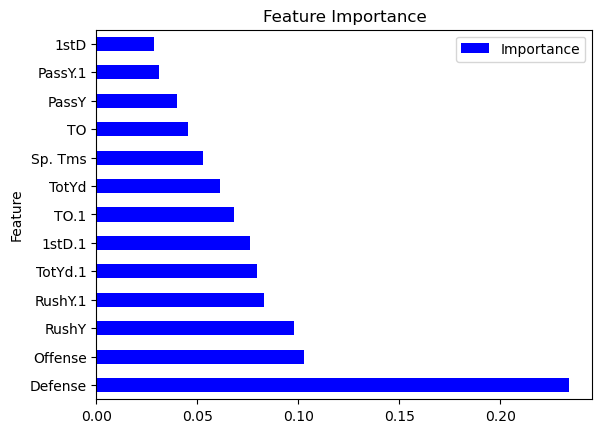

In [203]:
# Create a bar graph to show the feature importance
feat_importance_graph = importances_df[0:13].plot(
    kind='barh', 
    color='blue', 
    title= 'Feature Importance', 
    legend=True)

# Display the feature importance graph
feat_importance_graph

In [204]:
# Instantiate a RandomUnderSampler instance
rus = RandomUnderSampler(random_state=1)

# Fit the training data to the random undersampler model
X_undersampled, y_undersampled = rus.fit_resample(X_train, y_train)

# Count distinct values for the resampled target data
y_undersampled.value_counts()

0.0    102
1.0    102
Name: results, dtype: int64

In [205]:
# Instantiate a new RandomForestClassier model
model_undersampled = RandomForestClassifier()

# Fit the undersampled data the new model
model_undersampled.fit(X_undersampled, y_undersampled)

# Predict labels for undersampled testing features
y_pred_undersampled = model_undersampled.predict(X_test)

# Print the undersampled classification report
print(classification_report(y_test, y_pred_undersampled))

              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83        42
         1.0       0.81      0.81      0.81        37

    accuracy                           0.82        79
   macro avg       0.82      0.82      0.82        79
weighted avg       0.82      0.82      0.82        79



In [206]:
# Instantiate a RandomOversampler instance
ros = RandomOverSampler(random_state=1)

# Fit the model to the training data
X_oversampled, y_oversampled = ros.fit_resample(X_train, y_train)

# Count distinct values
y_oversampled.value_counts()

1.0    133
0.0    133
Name: results, dtype: int64

In [207]:
# Instantiate a new RandomForestClassier model
model_oversampled = RandomForestClassifier()

# Fit the oversampled data the new model
model_oversampled.fit(X_oversampled, y_oversampled)

# Predict labels for oversampled testing features
y_pred_oversampled = model_oversampled.predict(X_test)

# Print the oversampled classification report
print(classification_report(y_test, y_pred_oversampled))

              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84        42
         1.0       0.87      0.73      0.79        37

    accuracy                           0.82        79
   macro avg       0.83      0.82      0.82        79
weighted avg       0.83      0.82      0.82        79



In [208]:
# Use the base model to predict the outcome of the 2021 & 2022 seasons
pred_21_22 = model.predict(X_21_22)

# Print the classification report of the base random forest model
print(classification_report(y_21_22, pred_21_22))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        15
         1.0       1.00      0.75      0.86         4

    accuracy                           0.95        19
   macro avg       0.97      0.88      0.91        19
weighted avg       0.95      0.95      0.94        19



In [209]:
# Use the undersampled model to predict the outcome of the 2021 & 2022 seasons
under_pred_21_22 = model_undersampled.predict(X_21_22)

# Print the classification report of the undersampled random forest model
print(classification_report(y_21_22, under_pred_21_22))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.97        15
         1.0       0.80      1.00      0.89         4

    accuracy                           0.95        19
   macro avg       0.90      0.97      0.93        19
weighted avg       0.96      0.95      0.95        19



In [210]:
# Use the oversampled model to predict the outcome of the 2021 & 2022 seasons
over_pred_21_22 = model_oversampled.predict(X_21_22)

# Print the classification report of the oversampled random forest model
print(classification_report(y_21_22, over_pred_21_22))

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90        15
         1.0       0.67      0.50      0.57         4

    accuracy                           0.84        19
   macro avg       0.77      0.72      0.74        19
weighted avg       0.83      0.84      0.83        19

